# Определение стоимости автомобилей

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Открытие-файла-и-изучение-данных" data-toc-modified-id="Открытие-файла-и-изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Открытие файла и изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-названий-столбцов-и-их-типа-данных" data-toc-modified-id="Обработка-названий-столбцов-и-их-типа-данных-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Обработка названий столбцов и их типа данных</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Обработка-аномальных-значений" data-toc-modified-id="Обработка-аномальных-значений-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Обработка аномальных значений</a></span></li><li><span><a href="#Удаление-дубликатов" data-toc-modified-id="Удаление-дубликатов-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Удаление дубликатов</a></span></li><li><span><a href="#Оставление-нужных-столбцов-для-анализа" data-toc-modified-id="Оставление-нужных-столбцов-для-анализа-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Оставление нужных столбцов для анализа</a></span></li></ul></li><li><span><a href="#Подготовка-данных-к-обучению-моделей" data-toc-modified-id="Подготовка-данных-к-обучению-моделей-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Подготовка данных к обучению моделей</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>LightGBM</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

Нам доступны следующие признаки:  
  
`DateCrawled` — дата скачивания анкеты из базы   
`VehicleType` — тип автомобильного кузова  
`RegistrationYear` — год регистрации автомобиля  
`Gearbox` — тип коробки передач  
`Power` — мощность (л. с.)  
`Model` — модель автомобиля  
`Kilometer` — пробег (км)  
`RegistrationMonth` — месяц регистрации автомобиля  
`FuelType` — тип топлива  
`Brand` — марка автомобиля  
`Repaired` — была машина в ремонте или нет  
`DateCreated` — дата создания анкеты  
`NumberOfPictures` — количество фотографий автомобиля  
`PostalCode` — почтовый индекс владельца анкеты (пользователя)  
`LastSeen` — дата последней активности пользователя  
  
Нам необходимо предсказать цену автомобиля. Целевой признак:   
`Price` — цена (евро)

## Подготовка данных

### Открытие файла и изучение данных

In [1]:
! pip install lightgbm

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import phik
from phik.report import plot_correlation_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

In [3]:
try:
    data = pd.read_csv('/datasets/autos.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/autos.csv')

In [4]:
# Избавимся от предупреждений
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Выведем первые 5 строчек для понимания структуры датасета
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [6]:
def data_overview(data, hist):
    
    print(data.info(), end='\n')
    
    bars = []
    pies = []
    for col in data.columns:
        if col not in hist:
            if 4 < len(data[col].unique()) < 50:
                bars.append(col)
            elif len(data[col].unique()) < 50:
                pies.append(col)
    
    for col in bars:
        data[col].value_counts().plot(kind='bar')
        plt.title(col)
        plt.show()
        
    for col in pies:
        data[col].value_counts().plot(kind='pie', autopct='%1.0f%%')
        plt.ylabel('')
        plt.title(col)
        plt.show()
        
    data[hist].hist(bins=30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

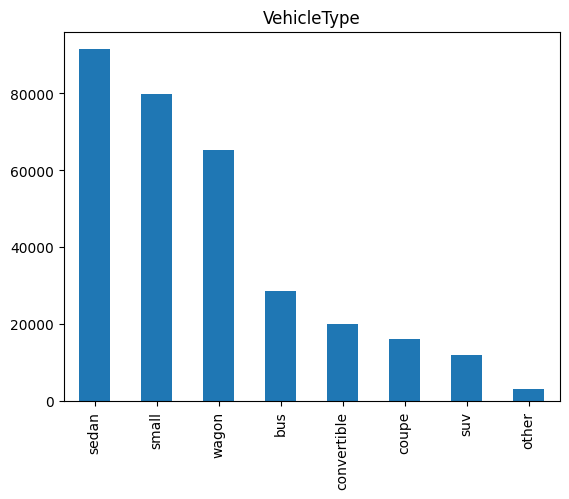

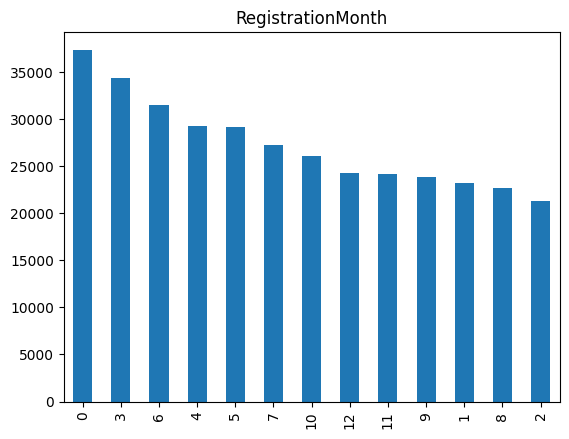

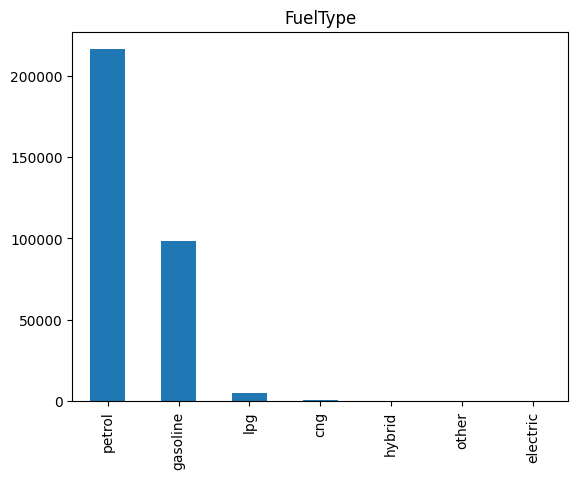

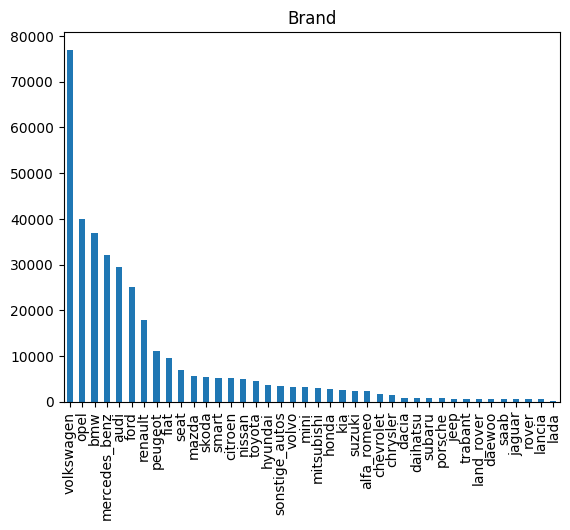

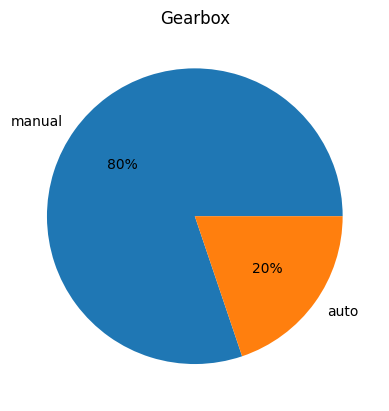

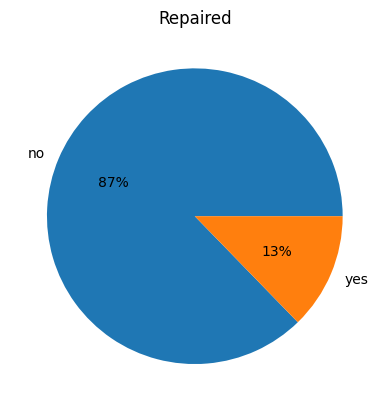

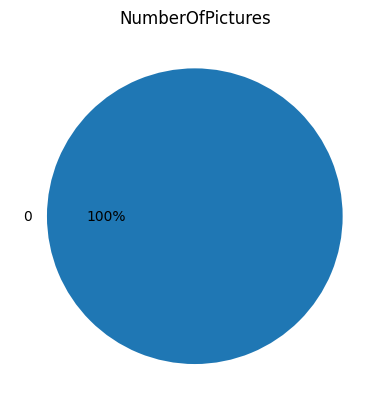

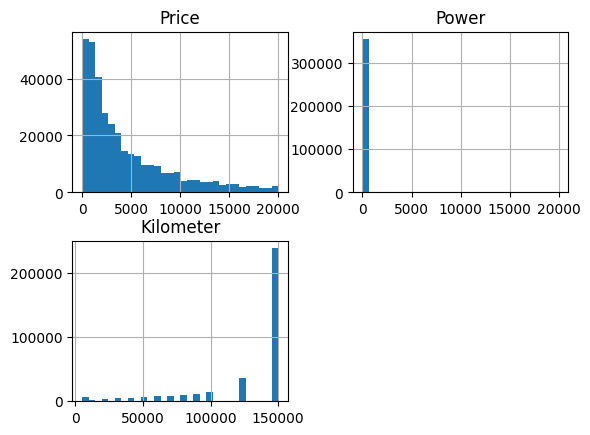

In [7]:
hist = ['Price', 'Power', 'Kilometer']
data_overview(data, hist)

Можно заметить, что в датасете присутствуют пропуски. Также, столбцы с датами не приведены к соответсующему типу данных, но для построения модели данные столбцы скорее всего не понадобятся (так как данные в остальных столбцах не зависят от даты выгрузки данных или даты последней активности пользователя). Более того, необходимо привести названия столбцов к нижнему регистру  
  
В выборке преобладают седаны, небольшие автомобили и фургоны. Большая часть представленных в датасете автомобилей используют бензин и газолин, также в выборке преобладают машины с механической коробкой передач, составляя примерно 80%. Около 87% представленных автомобилей не были в ремонте. Также, ни у одного автомобиля, представленного в выборке, нет фотографий, о чем нужно предупредить отвестсвенных за выгрузку данных, возможно произошел сбой.  
  
  Анализиря дату регистрации автомобиля, много машин было зарегестрировано в "нулевом месяце", что является аномальным значением, которое необходимо обработать. Касаемо брендов автомобилей из выборки, больше всего имеется машие марок Volkswagen, Opel и BMW, меньше всего - Rover, Lancla и Lada. Распределение целевого признака (цены автомобиля) похоже на хи квадратное. В выборке присутствует много значений около нуля, что также необходимо обработать как выбросы. Более того, судя по гистограммам по столбцам `Power` и `Kilometer`, будет необходимо обработать выбросы

### Предобработка данных

#### Обработка названий столбцов и их типа данных 

Для начала приведем названия столбцов в стандартный вид для более удобной работы

In [8]:
data.columns = data.columns.str.lower()
data = data.rename(columns={'datecrawled': 'date_crawled',
                           'vehicletype': 'vehicle_type',
                           'registrationyear': 'registration_year',
                           'registrationmonth': 'registration_month',
                           'fueltype': 'fuel_type',
                           'datecreated': 'date_created',
                           'numberofpictures': 'number_of_pictures',
                           'postalcode': 'postal_code',
                           'lastseen': 'last_seen'
                           })
#data.columns

Изменим тип в столбцах со временем

In [9]:
for col in ['date_crawled', 'date_created', 'last_seen']:
    data[col] = pd.to_datetime(data[col], format='%Y-%m-%d %H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        354369 non-null  datetime64[ns]
 1   price               354369 non-null  int64         
 2   vehicle_type        316879 non-null  object        
 3   registration_year   354369 non-null  int64         
 4   gearbox             334536 non-null  object        
 5   power               354369 non-null  int64         
 6   model               334664 non-null  object        
 7   kilometer           354369 non-null  int64         
 8   registration_month  354369 non-null  int64         
 9   fuel_type           321474 non-null  object        
 10  brand               354369 non-null  object        
 11  repaired            283215 non-null  object        
 12  date_created        354369 non-null  datetime64[ns]
 13  number_of_pictures  354369 no

#### Обработка пропусков

Далее, необходимо обработать пропуски  
  
Сначала сохраним изначальную длину датасета. Это необходимо, чтобы оценить, какой процент данных был удален в процессе обработки

In [10]:
initial_len = len(data)

In [11]:
data.isna().sum()

date_crawled              0
price                     0
vehicle_type          37490
registration_year         0
gearbox               19833
power                     0
model                 19705
kilometer                 0
registration_month        0
fuel_type             32895
brand                     0
repaired              71154
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

Скорее всего, если в столбце `repaired` пользователь ничего не указал в анкете, можно предположить, что автомобиль не был в ремонте

In [12]:
data['repaired'] = data['repaired'].fillna(value='no')
#data['repaired'].isna().sum()

Для заполнения пропусков в остальных столбцах проверим их на наличие корреляции с другими признаками. Так как в датасете присутствуют категориальные признаки, нужно использовать матрицу Phik

interval columns not set, guessing: ['price', 'power', 'kilometer', 'registration_month']


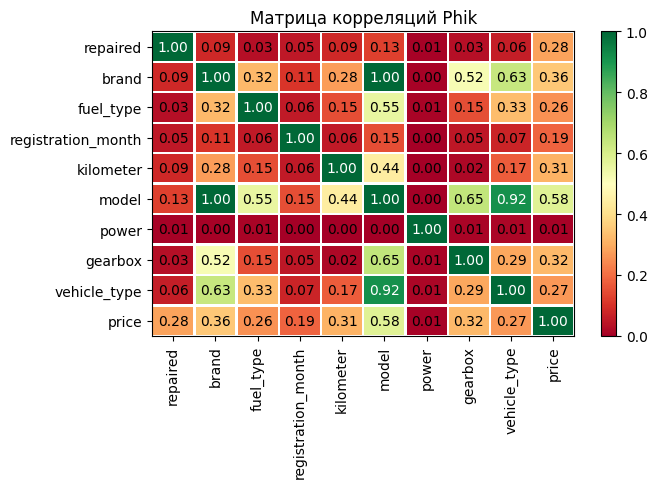

In [13]:
cols = ['price', 'vehicle_type', 'gearbox', 'power', 'model', 
                'kilometer', 'registration_month', 'fuel_type', 'brand', 'repaired']

phik_overview = data[cols].phik_matrix()
#phik_overview.round(2)

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, vmin=0, vmax=1)
plt.title('Матрица корреляций Phik')
plt.show()

Так как присутствует значительная корреляция между признаками `model` и `vehicle_type`, заполним пропуски в данных столбцах на основе друг друга. Для этого создадим вспомогательный датасет, разделим его по категориям из одного столбца, посчитаем моду для каждой категории в другом столбце и применим получившиеся значения, чтобы заполнить пропуски в изначальном датасете
  
Также, уровень корреляции между признаками `model` и `gearbox` достаточный, значит заполним пропуски в столбце `gearbox` на основе модели автомобиля (по указанному выше методу)

У признака `fuel_type` нет достаточного уровня корреляции с другими столбцами датасета. Следовательно, заполнить пропуски в данном столбце мы не можем  
  
О пропусках во всех столбцах и методах их заполнения необходимо предупредить руководство и заказчика

In [14]:
def dictionary_former(data, col_to_fill, auxiliary):
    
    dictionary = {}
    
    for elem in data[auxiliary].unique():
        value = data[data[auxiliary] == elem][col_to_fill]\
            .value_counts().sort_values(ascending=False).index
        if len(value) != 0:
            dictionary[elem] = value[0]
        else:
            dictionary[np.NaN] = 'unknown'
        
    return dictionary

In [15]:
vehicle_type_mode = dictionary_former(data, 'vehicle_type', 'model')
# vehicle_type_mode

model_mode = dictionary_former(data, 'model', 'vehicle_type')
# model_mode

gearbox_mode = dictionary_former(data, 'gearbox', 'model')
# gearbox_mode

In [16]:
def na_filler(data, col_to_fill, auxiliary, dictionary):
    
    # Создадим другой датасет с вспомогательным столбцом и столбцом, который необходимо заполнить
    additional_data = data[[col_to_fill, auxiliary]].copy()
    
    # Заполним пропуски в новом датасете по словарю dictionary
    additional_data['new_col_to_fill'] = (
        additional_data[auxiliary].map(lambda x: dictionary.get(x))
    )
    
    # Перенесем получившиеся значения на место пропусков в изначальном датасете
    data[col_to_fill] = data[col_to_fill].combine_first(additional_data['new_col_to_fill'])
    
    return data[col_to_fill]

In [17]:
data['vehicle_type'] = na_filler(data, 'vehicle_type', 'model', vehicle_type_mode)
# data['vehicle_type']

data['gearbox'] = na_filler(data, 'gearbox', 'model', gearbox_mode)
# data['gearbox']

data['model'] = na_filler(data, 'model', 'vehicle_type', model_mode)
# data['model']

In [18]:
deleted = len(
    data[(data['model'] == 'unknown') | 
         (data['vehicle_type'] == 'unknown') | 
         (data['gearbox'] == 'unknown')]
) / len(data)

In [19]:
data = data.query('model != "unknown" and vehicle_type != "unknown" and gearbox != "unknown"')

In [20]:
data['fuel_type'] = data['fuel_type'].fillna(value='unknown')

In [21]:
data.isna().sum()

date_crawled          0
price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
kilometer             0
registration_month    0
fuel_type             0
brand                 0
repaired              0
date_created          0
number_of_pictures    0
postal_code           0
last_seen             0
dtype: int64

In [22]:
print(f'В процессе обработки пропусков было удалено {deleted:.2%} датасета')

В процессе обработки пропусков было удалено 2.24% датасета


#### Обработка аномальных значений

Как было подмечено ранее, необходимо обработать аномальные значения в столбцах `price` и `power` 

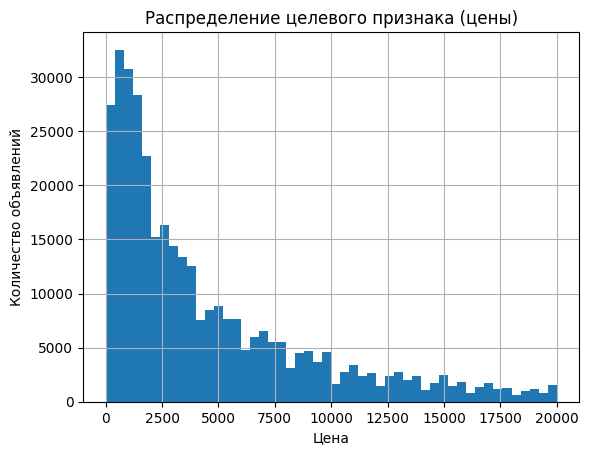

In [23]:
# Построим гистограмму, чтобы оценить распределние цены и определить границу аномальных значений
data['price'].hist(bins=50)
plt.title('Распределение целевого признака (цены)')
plt.ylabel('Количество объявлений')
plt.xlabel('Цена')
plt.show()

Возьмем 500 евро в качестве минимально доступной цены за автомобиль и удалим аномальные значения из датасета

In [24]:
PRICE_MIN = 500
data = data.query('price >= @PRICE_MIN')
# data[data['price'] < 500]

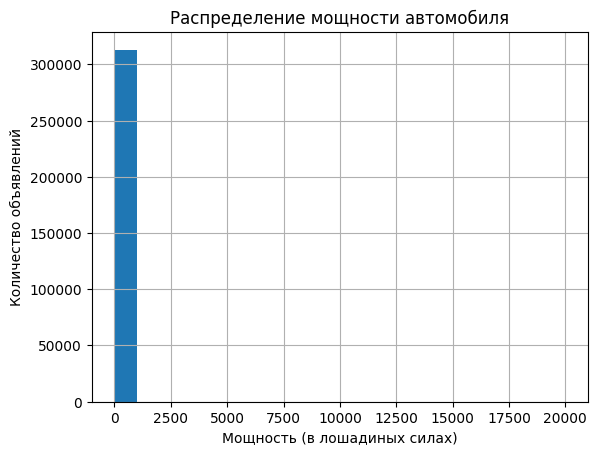

In [25]:
# Построим гистограмму, чтобы оценить распределние мощности и определить границу аномальных значений
data['power'].hist(bins=20)
plt.title('Распределение мощности автомобиля')
plt.ylabel('Количество объявлений')
plt.xlabel('Мощность (в лошадиных силах)')
plt.show()

Много значений сосредоточено около нуля, однако гистогграмма определяет границы до 20000 лошадиных сил. Значит, присутствуют выбросы. Определим нормальные значения до 300 лошадиных сил и удалим выбросы в качестве нулевого значения мощности

In [26]:
POWER_MAX = 300
POWER_MIN = 0
data = data.query('@POWER_MIN < power <= @POWER_MAX')
# data[data['power'] > 300]
# data[data['power'] == 0]

In [27]:
# Проверим столбец с годом регистрации автомобиля на наличие выбросов
data['registration_year'].describe()

count    283591.000000
mean       2003.579116
std          20.579364
min        1000.000000
25%        1999.000000
50%        2004.000000
75%        2008.000000
max        8200.000000
Name: registration_year, dtype: float64

Найдем максимальную дату скачивания анкеты из базы. Это опоможет нам найти верхнюю границу, ограничивающую год регистрации автомобиля

In [28]:
YEAR_MAX = max(data['date_crawled'].dt.year)
print(f'Последний год скачивания анкеты в датасете: {YEAR_MAX}')

Последний год скачивания анкеты в датасете: 2016


Минимальное и максимальное значения свидетельствуют о наличии выбросов. Удалим строчки с годом регистрации меньше 1900 и больше 2016

In [29]:
YEAR_MIN = 1900
data = data.query('@YEAR_MIN <= registration_year <= @YEAR_MAX')
# data[data['registration_year'] < 1900]
# data[data['registration_year'] > 2016]

#### Удаление дубликатов

In [30]:
data.duplicated().sum()

5

In [31]:
data = data.drop_duplicates()
# data.duplicated().sum()

#### Оставление нужных столбцов для анализа

Для анализа не понадобятся столбцы с датой скачивания анкеты `date_crawled`, месяцем регистрации автомобиля `registration_month`, датой создания анкеты `date_created`, количеством фотографий автомобиля `number_of_pictures` (так как у всех автобилей фото отсутствуют), почтовым индексом `postal_code` и датой последней активности пользователя `last_seen`

In [32]:
data_adjusted = data.drop(['date_created',
                           'date_crawled', 
                           'registration_month', 
                           'date_created', 
                           'number_of_pictures', 
                           'postal_code', 
                           'last_seen'], axis=1).copy()

Предобработка данных завершена

In [33]:
print(f'В ходе предобработки данных было удалено '
      f'{(abs(len(data_adjusted) - initial_len) / initial_len):.1%} данных')

В ходе предобработки данных было удалено 22.4% данных


Был удален довольно большой процент от изначального датасета в основном из-за выбросов. О данной проблеме необходимо предупредить людей, ответственных за выгрузку данных. Возможно, произошел технический сбой 

### Подготовка данных к обучению моделей

Разделим датасет на обучающую, валидационную и тестовую выборки в соотношении 60% : 20% : 20% соответственно

In [34]:
# Отделим признаки и целевой признак
features = data_adjusted.drop(['price'], axis=1)
target = data_adjusted['price']

# Разделим датасет на обучающую и валидационную выборки
features_train, features_valid, target_train, target_valid = (
    train_test_split(features, target, test_size=0.4, random_state=12345)
)

# Разделим валидационную выборку на валидационную и тестовую
features_valid, features_test, target_valid, target_test = (
    train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345)
)

Проведем масштабирование признаков. Это необходимо из-за сильного разброса в данных

In [35]:
# Запишем все количественные признаки в список numeric
numeric = ['registration_year', 'power', 'kilometer']

features_train_scaled = features_train.copy()
features_valid_scaled = features_valid.copy()
features_test_scaled = features_test.copy()

# Используем метод StandardScaler
# Он приводит все значения к стандартному нормальному распределению
scaler = StandardScaler()
scaler.fit(features_train_scaled[numeric])
features_train_scaled[numeric] = scaler.transform(features_train_scaled[numeric])
features_valid_scaled[numeric] = scaler.transform(features_valid_scaled[numeric])
features_test_scaled[numeric] = scaler.transform(features_test_scaled[numeric])

#features_train.head()
#features_valid.head()
#features_test.head()

Для подготовки качественных признаков к построению линейных моделей, используем технику OHE

In [36]:
# Сохраним категориальные признаки в список ohe_features
ohe_features = features_train.select_dtypes(include='object').columns.to_list()

# Сохраним копии признаков
features_train_ohe = features_train_scaled.copy()
features_valid_ohe = features_valid_scaled.copy()
features_test_ohe = features_test_scaled.copy()

# Создадим encoder и обучим его на тренировочных данных
encoder_ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False)
encoder_ohe.fit(features_train_ohe[ohe_features].copy())

features_train_ohe[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(
    features_train_ohe[ohe_features])
features_train_ohe = features_train_ohe.drop(ohe_features, axis=1)
#features_train_ohe.head()

features_valid_ohe[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(
    features_valid_ohe[ohe_features])
features_valid_ohe = features_valid_ohe.drop(ohe_features, axis=1)
#features_valid_ohe.head()

features_test_ohe[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(
    features_test_ohe[ohe_features])
features_test_ohe = features_test_ohe.drop(ohe_features, axis=1)
#features_test_ohe.head()

Для обучения моделей, основанных на дереве решений, используем технику порядкового кодирования, так как это ускорит скорость их работы

In [37]:
# Создадим и обучим encoder
encoder_ord = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-99999)
cat_columns = features_train_scaled.select_dtypes(include='object').columns.to_list()
encoder_ord.fit(features_train_scaled[cat_columns])

# Сохраним копии признаков
features_train_ord = features_train_scaled.copy()
features_valid_ord = features_valid_scaled.copy()
features_test_ord = features_test_scaled.copy()

# Преобразуем признаки по обученному encoder
features_train_ord[cat_columns] = encoder_ord.transform(features_train_ord[cat_columns])
# features_train_ord
features_valid_ord[cat_columns] = encoder_ord.transform(features_valid_ord[cat_columns])
# features_valid_ord
features_test_ord[cat_columns] = encoder_ord.transform(features_test_ord[cat_columns])
# features_test_ord

Данные готовы к построению моделей

## Обучение моделей

Перед нами стоит задача регрессии, так как необходимо предсказать непрерывный признак - цену автомобиля.  
Для начала проверим простые модели:  
- Линейная регрессия
- Дерево решений для регрессии  
  
Далее, обучим градиентный бустинг LightGBM

### Линейная регрессия

In [38]:
%%time
model_regression = LinearRegression()

model_regression.fit(features_train_ohe, target_train)
predictions_regression = model_regression.predict(features_valid_ohe)

rmse_regression = mean_squared_error(target_valid, predictions_regression, squared=False)
print(f'RMSE модели линейной регрессии: {rmse_regression}')

RMSE модели линейной регрессии: 2575.5172996967526
CPU times: total: 17.1 s
Wall time: 5.78 s


Значение метрики RMSE не прошло порогового значения 2500 евро. Рассмотрим другие модели

### Дерево решений

In [39]:
%%time
model_tree_list = []
tree_train_rmse_list = []
tree_valid_rmse_list = []
tree_depth_list = list(range(1, 11))

for depth in range(1, 11):
    model_tree = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    model_tree.fit(features_train_ord, target_train)
    model_tree_list.append(model_tree)
    
    predictions_valid_tree = model_tree.predict(features_valid_ord)
    rmse_valid = mean_squared_error(target_valid, predictions_valid_tree, squared=False)
    tree_valid_rmse_list.append(rmse_valid)
    
    predictions_train_tree = model_tree.predict(features_train_ord)
    rmse_train = mean_squared_error(target_train, predictions_train_tree, squared=False)
    tree_train_rmse_list.append(rmse_train)
    
    print(f'Глубина дерева: {depth}, \n'
         f'RMSE дерева решений на обучающей выборке: {rmse_train}, \n'
         f'RMSE дерева решений на валидационной выборке: {rmse_valid}')
    print('-' * 70)

Глубина дерева: 1, 
RMSE дерева решений на обучающей выборке: 3574.9687298589374, 
RMSE дерева решений на валидационной выборке: 3568.2535621145703
----------------------------------------------------------------------
Глубина дерева: 2, 
RMSE дерева решений на обучающей выборке: 3160.156785514708, 
RMSE дерева решений на валидационной выборке: 3130.1249341389616
----------------------------------------------------------------------
Глубина дерева: 3, 
RMSE дерева решений на обучающей выборке: 2888.271339419525, 
RMSE дерева решений на валидационной выборке: 2857.2463442612598
----------------------------------------------------------------------
Глубина дерева: 4, 
RMSE дерева решений на обучающей выборке: 2570.9475106271807, 
RMSE дерева решений на валидационной выборке: 2558.451472023185
----------------------------------------------------------------------
Глубина дерева: 5, 
RMSE дерева решений на обучающей выборке: 2396.1139653719024, 
RMSE дерева решений на валидационной выборке

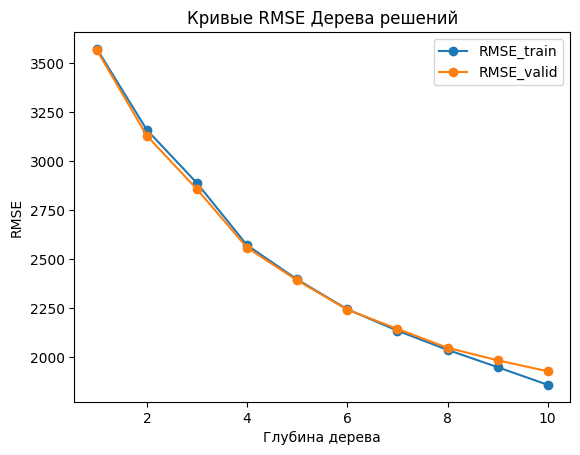

In [40]:
plt.plot(tree_depth_list, tree_train_rmse_list, linestyle='-', marker='o')
plt.plot(tree_depth_list, tree_valid_rmse_list, linestyle='-', marker='o')
plt.legend(['RMSE_train', 'RMSE_valid'])

plt.ylabel('RMSE')
plt.xlabel('Глубина дерева')
plt.title('Кривые RMSE Дерева решений')

plt.show()

RMSE модели по предсказаниям на обучающей выборке имеет склонность убывать быстрее, чем на валидационной выборке. Это происходит из-за переобучения модели, так как она просто запоминает данные  
  
Остановимся на максимальной глубине дерева = 6, так как далее при увеличении глубины дерева RMSE на обучающей выборке убывает сильнее, чем на валидационной (модель начинает переобучаться)

In [41]:
%%time
model_tree = model_tree_list[5]
predictions_tree = model_tree.predict(features_valid_ord)
rmse_tree = mean_squared_error(target_valid, predictions_tree, squared=False)
print(f'RMSE дерева решений с максимальной глубиной 6: {rmse_tree}')

RMSE дерева решений с максимальной глубиной 6: 2241.9809562175597
CPU times: total: 0 ns
Wall time: 19.7 ms


In [42]:
# Удалим лишние переменные
del model_tree_list, tree_train_rmse_list, tree_valid_rmse_list, tree_depth_list

### LightGBM

In [43]:
# Переведем тип данных object на category
features_train_light = features_train.copy()
features_valid_light = features_valid.copy()
features_test_light = features_test.copy()

samples = [features_train_light, features_valid_light, features_test_light]

for sample in samples:
    for col in sample.select_dtypes(include='object').columns:
        sample[col] = sample[col].astype('category')
        
# Переведем тип данных float на int
for sample in samples:
    for col in sample.select_dtypes(include='float64').columns:
        sample[col] = sample[col].astype('int64')

# features_train_light.info()
# features_valid_light.info()
# features_test_light.info()

In [44]:
%%time

best_model_light = None
best_depth = 0
best_rate = 0
best_estim = 0
rmse_light = 10**6

for depth in list(range(1, 6)):
    for rate in [0.01, 0.05, 0.1, 0.15]:
        for estim in list(range(100, 301, 100)):
            model_light = LGBMRegressor(max_depth=depth, learning_rate=rate, n_estimators=estim, 
                                        random_state=12345)
            model_light.fit(features_train_light, target_train)
            
            predictions_light = model_light.predict(features_valid_light)
            rmse_try = mean_squared_error(target_valid, predictions_light, squared=False)
            
            if rmse_try < rmse_light:
                rmse_light = rmse_try
                best_model_light = model_light
                best_rate = rate
                best_depth = depth
                best_estim = estim

CPU times: total: 10min 37s
Wall time: 1min 56s


In [45]:
%%time
# Проверим время обучения модели

model_light = best_model_light
model_light.fit(features_train_light, target_train)

predictions_light = model_light.predict(features_valid_light)
rmse_light = mean_squared_error(target_valid, predictions_light, squared=False)

print(f'RMSE модели LightGBM: {rmse_light}, \n'
     f'Параметры модели: максимальная глубина дерева - {best_depth}, скорость обучения - {best_rate},'
     f' количество деревьев - {best_estim}')

RMSE модели LightGBM: 1519.3731132121077, 
Параметры модели: максимальная глубина дерева - 5, скорость обучения - 0.15, количество деревьев - 300
CPU times: total: 19.2 s
Wall time: 3.46 s


Проверим, какие признаки больше всего повлияли на определение цены автомобиля

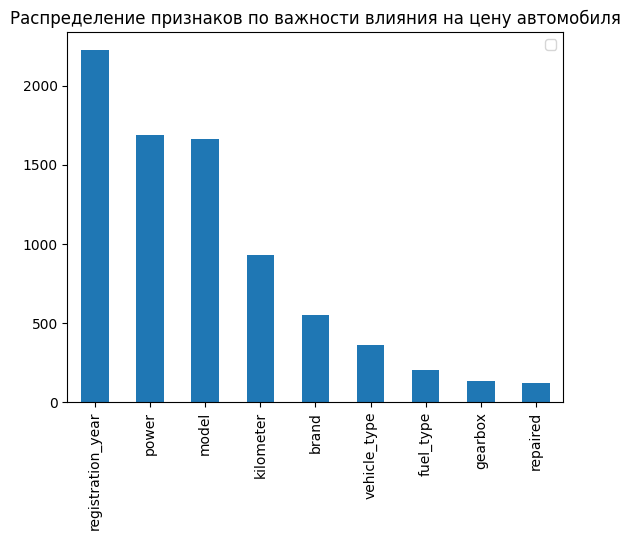

In [46]:
feature_importance = pd.DataFrame(
    {'importance':model_light.feature_importances_,'feature':features_train_light.columns}
)
feature_importance.sort_values(by='importance', ascending=False).plot(kind='bar', y='importance', 
                                                                      x='feature')
plt.title('Распределение признаков по важности влияния на цену автомобиля')
plt.xlabel('')
plt.legend('')
plt.show()

Больше всего определение цены автомобиля оказывает влияние год регистрации, его мощность, модель и пробег

In [47]:
# Удалим лишние переменные
del best_model_light, best_depth, best_rate, best_estim

## Анализ моделей

In [48]:
rmse_table = pd.DataFrame(
    {
        'Модель': ['Линейная регрессия', 'Дерево решений', 'LightGBM'],
        'RMSE на валидационной выборке': [rmse_regression, rmse_tree, rmse_light],
        'Время подбора лучшей модели': ['6.13 s', '5.39 s', '1min 56s'],
        'Время обучения модели': ['6.13 s', '25.4 ms', '3.42 s']
    }
)
rmse_table = rmse_table.set_index('Модель')
rmse_table

,RMSE на валидационной выборке,Время подбора лучшей модели,Время обучения модели
Модель,,,
Линейная регрессия,2575.517300,6.13 s,6.13 s
Дерево решений,2241.980956,5.39 s,25.4 ms
LightGBM,1519.373113,1min 56s,3.42 s


## Тестирование лучшей модели

Подбор параметров у модели LightGBM самый долгий, но данная модель дает наи лучший результат RMSE с большим отрывом от других моделей - примерно 1519.48. Проверим работу LightGBM на тестовой выборке

In [49]:
predictions_test_light = model_light.predict(features_test_light)
rmse_test_light = mean_squared_error(target_test, predictions_test_light, squared=False)
print(f'RMSE модели LightGBM на тестовой выборке: {rmse_test_light}')

RMSE модели LightGBM на тестовой выборке: 1538.4335127436286


На тестовой выборке среднеквадратичная ошибка получилась больше, чем на средней. Покатель прошел бенчмарк по желаемому результате RMSE (меньше 2500). Следовательно, модель может быть представлена заказчику

## Вывод

Подводя итоги, задачей данного проекта было построить модель, определяющую рыночную стоимость автомобиля с корнем из среднеквадратичной ошибки не более 2500.    
  
  Сначала мы открыли файл с данными и изучили их. Нам был представлен датасет с техническимим характеристиками и рыночной стоимостью других автомобилей. При анализе выборки мы обнаружили выбросы, которые в дальнейшем обработали. Наибольшее количество автомобилей в выборке - седаны, небольшие автомобили и фургоны, использующие бензин или газолин. В выборке преобладают машины с механической коробкой передач и отремантированные автомобили.  
    
   При предобработке данных мы поработали с пропусками, заполнив их на основе признаков в других столбцах по наибольшей корреляции. Также, мы обработали выбросы и оставили только нужные для построения модели столбцы. Далее мы подготовили данные к построению моделей: разделили датасет на обучающую, валидационную и тестовую выборки в соотношении 60% : 20% : 20%, привели признаки к нормальному распределению и обработали категориальные значения.  
     
   Так как перед нами стояла задача регрессии (необходимо было предсказать непрерывную величину), мы выбрали следующие модели для анализа:
   - Линейная регрессия
   - Дерево решений для регрессии
   - Градиентный бустинг LightGBM   
  
Модель линейной регрессии не прошла по бенчмарку значения RMSE (ошибка больше 2500), модель градиентого бустинга LightGBM показала наилучший результат корня из среднеквадратичной ошибки - примерно 1519.48. При сравнении моделей мы также обнаружили, что подбор параметров у модели LightGBM занимает больше всего времени - около 2 минут. В качестве наилучшей модели был выбран градиентный бустинг. Проверив модель на тестовой выборке, мы заметили значение RMSE больше, чем на тестовой - примерно 1538.43.  
    
   Так как была найдена наилучшая модель по RMSE, которая проходит по поставленной задаче (корень из среднеквадратичной ошибки меньше 2500) - градиентный бустинг LightGBM, цель проекта выполнена и модель может быть представлена заказчику. 